## Part b) Basic Operations on DataFrames (6 points)

Use dataset students.json (download from learnweb) for this exercise. First creating DataFrames from the dataset and do several tasks as follows:


In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext

In [3]:
# Read JSON file into dataframe
spark = SparkSession.builder.appName(
    'Read Json File into DataFrame').getOrCreate()
df = spark.read.json("students.json")
df.printSchema()
df.show()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/07/03 10:58:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on port 4047. Attempting port 4048.
22/07/03 10:58:50 WARN Utils: Service 'SparkUI' could not bind on

root
 |-- course: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- points: long (nullable = true)
 |-- s_id: long (nullable = true)

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978

1. Replace the null value(s) in column points by the mean of all points. (0.5 point)

In [5]:
#Replace mean for null on only points column 
mean = df.agg({'points': 'mean'}).collect()
mean = mean[0][0]
print("The mean of the points column is ", mean)
new_df = df.na.fill(value=mean,subset=["points"])

The mean of the points column is  11.736842105263158


In [6]:
new_df.show() # we can see that the null values has been replaced by the mean

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

2. Replace the null value(s) in column dob and column last name by "unknown" and "--" respec- tively. (0.5 point)

In [8]:
df1 = new_df.na.fill(value="unknown",subset=["dob"])
df1.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

In [9]:
df2 = df1.na.fill(value="--",subset=["last_name"])
df2.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

3. In the dob column, there exist several formats of dates, e.g. October 14, 1983 and 26 December 1989. Let’s convert all the dates into DD-MM-YYYY format where DD, MM and YYYY are two digits for day, two digits for months and four digits for year respectively. (2 points)

In [17]:
from dateutil import parser
from datetime import datetime
import datetime

In this function below I convert the provided date format as "%m-%d-%Y" format and update the values in a new column name new_date. For those rows which have values as 'unknown' I returned "1" as their date of birth.

In [21]:
def date(input):
    if input == "unknown":
        return "1"
    else:
        obj=str(parser.parse(input))
        d = obj.split(" ")
        d = datetime.datetime.strptime(d[0], '%Y-%m-%d').strftime('%m-%d-%Y')
        return d

In [22]:
from pyspark.sql import functions as F
from pyspark.sql.functions import to_date
from pyspark.sql.types import StringType

In [23]:
data = df2.withColumn("new_date",  F.udf(date, StringType())(F.col("dob")))
data.show()

+------------------+------------------+----------+---------+------+----+----------+
|            course|               dob|first_name|last_name|points|s_id|  new_date|
+------------------+------------------+----------+---------+------+----+----------+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|10-14-1983|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|09-26-1980|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|06-12-1982|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|04-05-1987|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|11-01-1978|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|02-17-1981|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|01-01-1984|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|01-13-1978|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|12-2

4. Insert a new column age and calculate the current age of all students. (1 point)

In [27]:
from dateutil import relativedelta

In this function I calculate the current age of each student and store them in a new column Current_age. For those rows which have birthdate as "1" I didn't calculate the current age adn just returned a null value.

In [32]:
 def calculateAge(birthDate):
    
    if birthDate == "1":
#         print('this is 1')
        return ""
    else:
        start_date = datetime.datetime.strptime(birthDate, '%m-%d-%Y')
        today = datetime.datetime.today()
        delta = relativedelta.relativedelta(today,start_date)
        return delta.years

In [33]:
data1 = data.withColumn("Current_age",  F.udf(calculateAge, StringType())(F.col("new_date")))
data1.show()

+------------------+------------------+----------+---------+------+----+----------+-----------+
|            course|               dob|first_name|last_name|points|s_id|  new_date|Current_age|
+------------------+------------------+----------+---------+------+----+----------+-----------+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|10-14-1983|         38|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|09-26-1980|         41|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|06-12-1982|         40|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|04-05-1987|         35|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|11-01-1978|         43|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|02-17-1981|         41|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|01-01-1984|         38|
|     Deep Learning|  January 13, 1978| 

In [35]:
sd = data1.agg({'points': 'stddev'}).collect()
print("The standard deviation of the points column is ",sd[0][0])

The standard deviation of the points column is  3.246050231475656


In [37]:
mean = data1.agg({'points': 'mean'}).collect()
print("The mean of the points column is ",mean[0][0])

The mean of the points column is  11.7


5. Let’s consider granting some points for good performed students in the class. For each student, if his point is larger than 1 standard deviation of all points, then we update his current point to 20, which is the maximum. See Annex 1 for a tutorial on how to calculate standard deviation. (2 points)

In [39]:
std_1 = mean[0][0]+sd[0][0]
std_2 = mean[0][0]-sd[0][0]

Here for each student, I check if his point is larger than 1 standard deviation of all points, then I update his current point to 20.

In [41]:
from pyspark.sql.functions import when
df3 = data1.withColumn("points", when(data1.points>std_1,20).otherwise(data1.points))
df3.show()


+------------------+------------------+----------+---------+------+----+----------+-----------+
|            course|               dob|first_name|last_name|points|s_id|  new_date|Current_age|
+------------------+------------------+----------+---------+------+----+----------+-----------+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|10-14-1983|         38|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    20|   2|09-26-1980|         41|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    20|   3|06-12-1982|         40|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|04-05-1987|         35|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|11-01-1978|         43|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|02-17-1981|         41|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|01-01-1984|         38|
|     Deep Learning|  January 13, 1978| 

6. Create a histogram on the new points created in the task 5. (1 point)

[10, 20, 20, 12, 11, 10, 14, 10, 20, 11, 12, 11, 13, 12, 9, 7, 9, 6, 20, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


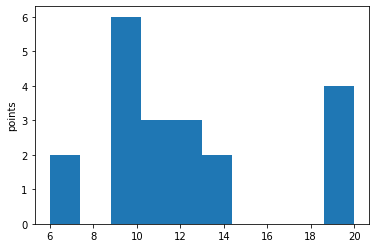

In [42]:
import numpy as np
import matplotlib.pyplot as plt
points=[]
points_array = np.array(df3.select('points').collect())
# points_array
for value in points_array:
    points.append(value[0])
print(points)
student_id=[]    
id_array = np.array(df3.select('s_id').collect())
# points_array
for value in id_array:
    student_id.append(value[0])
print(student_id)
    
plt.hist(points)
# plt.xlabel("sd_id")
plt.ylabel("points")
plt.show()